In [1]:
# Standard import for pandas and numpy
import pandas as pd
import numpy as np


#Load the data set into jupyter
airQualityDataSet = pd.read_excel("AirQualityUCI.xlsx")
airQualityDataSet.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [16]:
#remove outliers from the air quality data set
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt

#load data set and explore
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
# define a function called "outliers" which returns a list of index of outliers
#IQR = Q3 - Q1
#+/- 1.5 * IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

# create an empty list to store the output indices from multiple columns
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
index_list = []
for feature in ["CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)",
                "PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","T", "AH", "RH"]:
    index_list.extend(outliers(aqDataSet_raw, feature))
    
# define a function called "remove" which returns a cleanset dataframe without outliers

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

airQuaDatset = remove(aqDataSet_raw, index_list)
airQuaDatset.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,5463.000000,5463.000000,5463.0,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000
mean,1.901135,1076.459027,-200.0,9.281789,920.530890,220.711441,808.396058,110.074794,1408.268351,997.346086,18.593778,47.945052,1.019410
std,1.068772,174.429823,0.0,5.726028,220.527078,148.103930,196.167067,43.057097,333.548264,334.338003,9.325558,17.704623,0.421377
min,0.100000,666.750000,-200.0,0.423729,431.250000,2.000000,359.750000,2.000000,601.000000,287.750000,-1.900000,9.175000,0.184679
25%,1.100000,942.000000,-200.0,4.755590,751.000000,103.000000,664.625000,78.000000,1155.500000,744.125000,11.625000,34.000000,0.696732
50%,1.700000,1057.000000,-200.0,8.141759,905.000000,184.000000,787.250000,108.000000,1417.750000,970.500000,18.325000,47.875000,1.009018
75%,2.600000,1191.500000,-200.0,12.883302,1079.750000,310.000000,927.250000,137.850000,1647.500000,1225.125000,25.100000,61.575000,1.315422
max,5.600000,1667.000000,-200.0,28.008952,1503.500000,634.000000,1444.750000,252.900000,2366.750000,2029.750000,43.424999,88.725000,2.180639


In [3]:
#One-sample t test for testing the NO2’ hourly mean against the standard hourly mean (200mg/m3) 
#of nitrogen dioxide given by the Air Quality Strategy
import pandas as pd
from scipy import stats

stats.ttest_1samp(airQuaDatset["NO2(GT)"], 200)  


Ttest_1sampResult(statistic=-154.36622807300657, pvalue=0.0)

In [5]:
#One-sample t test for testing the NO2’ hourly mean against the standard hourly mean (200mg/m3) 
#of nitrogen dioxide given by the Air Quality Strategy
import pandas as pd
from scipy import stats

stats.ttest_1samp(airQuaDatset['PT08.S4(NO2)'], 200.0)  

Ttest_1sampResult(statistic=267.74435015208275, pvalue=0.0)

In [6]:


import pandas as pd
from scipy import stats

mean_no2when_tempishigherthan15 = airQuaDatset[airQuaDatset['T']>15.0]['NO2(GT)']
mean_no2when_tempislessthan15 = airQuaDatset[airQuaDatset['T']<15.0]['NO2(GT)']

stats.ttest_ind(mean_no2when_tempishigherthan15, mean_no2when_tempislessthan15)



Ttest_indResult(statistic=-23.61409949249407, pvalue=1.8042039062240103e-117)

In [8]:
#Here we use matched pair t-test to find out whether pollutant PT08.S4(NO2)’s hourly mean is 
#significantly different from the air pollutant PT08.S5(O3)’s hourly mean.
import pandas as pd
from scipy import stats


stats.ttest_rel(airQuaDatset['PT08.S4(NO2)'], airQuaDatset['PT08.S5(O3)'])


Ttest_relResult(statistic=89.32712644819357, pvalue=0.0)

            CO(GT)  PT08.S1(CO)  NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  5463.000000  5463.000000    5463.0  5463.000000    5463.000000   
mean      1.901135  1076.459027    -200.0     9.281789     920.530890   
std       1.068772   174.429823       0.0     5.726028     220.527078   
min       0.100000   666.750000    -200.0     0.423729     431.250000   
25%       1.100000   942.000000    -200.0     4.755590     751.000000   
50%       1.700000  1057.000000    -200.0     8.141759     905.000000   
75%       2.600000  1191.500000    -200.0    12.883302    1079.750000   
max       5.600000  1667.000000    -200.0    28.008952    1503.500000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  5463.000000   5463.000000  5463.000000   5463.000000  5463.000000   
mean    220.711441    808.396058   110.074794   1408.268351   997.346086   
std     148.103930    196.167067    43.057097    333.548264   334.338003   
min       2.000000    359.750000     2

Text(0, 0.5, 'Values')

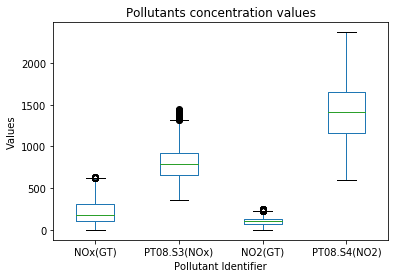

In [9]:
#Here we have 4 types of air pollutants in the dataset which have nitrogen oxide variations.
#Those are (NOx(GT), PT08.S3(NOx), NO2(GT)  and PT08.S4(NO2 pollutants. So we are going to use one-way
#ANOVA to test whether there is any significant difference in the nitrogen oxide-related pollutants’ 
#means, when compared with each.

import pandas as pd
from matplotlib import pyplot as plt

print(airQuaDatset.describe())

airQuaDatset.boxplot(column=["NOx(GT)","PT08.S3(NOx)","NO2(GT)", "PT08.S4(NO2)"], grid=False)
plt.title("Pollutants concentration values")
plt.xlabel("Pollutant Identifier")
plt.ylabel("Values")

In [17]:
import pandas as pd
import scipy.stats as stats

fvalue, pvalue = stats.f_oneway(airQuaDatset["NOx(GT)"], airQuaDatset["PT08.S3(NOx)"],
                                airQuaDatset["NO2(GT)"],  airQuaDatset["PT08.S4(NO2)"])
print("F Value  = {:g} ".format(fvalue))
print("P Value  = {:g} ".format(pvalue))



F Value  = 45132.5 
P Value  = 0 


In [18]:
#https://plotly.com/python/v3/anova/
#Two Way ANOVA
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm



formula = 'T~ AH + RH + AH * RH'
model = ols(formula, airQuaDatset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n")
print(anova_table)



                 sum_sq      df             F        PR(>F)
AH        284325.625591     1.0  42462.406987  0.000000e+00
RH        225172.047203     1.0  33628.158175  0.000000e+00
AH:RH       2933.101114     1.0    438.041886  1.261959e-93
Residual   36553.123109  5459.0           NaN           NaN


In [19]:
#https://plotly.com/python/v3/anova/
#Two Way ANOVA
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


airQuaDatset=airQuaDatset.rename(columns = {'NOx(GT)':'NOX', 'NO2(GT)':'NO2'})

airQuaDatset

formula = 'AH ~ NOX + NO2 + NOX * NO2'
model = ols(formula, airQuaDatset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n")
print(anova_table)



              sum_sq      df            F         PR(>F)
NOX        17.605648     1.0   124.058568   1.656228e-28
NO2       147.770474     1.0  1041.267751  3.054831e-209
NOX:NO2     0.078259     1.0     0.551454   4.577562e-01
Residual  774.708538  5459.0          NaN            NaN
